## Попробуем разные фильтры с целью - подсветить неоднородности керна

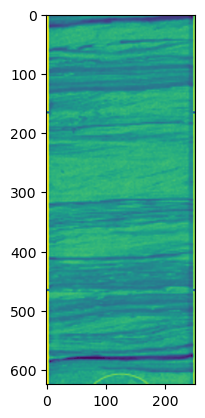

In [8]:
# Загрузка изображения керна

import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение из URL
url_core_image = 'https://github.com/aleksandrbogdanovmsu/comp_vision_classes/blob/main/HW2%20-%20Filters/kore.png?raw=true'
response = requests.get(url_core_image)
gray_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_image)

In [9]:
# 1. Фильтр повышения резкости
# Используем ядро Лапласиана для повышения резкости

def apply_sharpen(intensity):
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5 + intensity, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernel)
    cv2.imshow('Sharpen Filter', sharpened_image)

def on_sharpen_trackbar(val):
    intensity = val / 10  # нормализуем значение
    apply_sharpen(intensity)

cv2.namedWindow('Sharpen Filter')
cv2.createTrackbar('Intensity', 'Sharpen Filter', 10, 50, on_sharpen_trackbar)
on_sharpen_trackbar(10)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 2. Фильтр выделения краев - может быть полезен для анализа слоистости и определения границ между различными минералами и структурами
# Применяем оператор Canny для выделения краев

def apply_canny(thresh1, thresh2):
    edges = cv2.Canny(gray_image, thresh1, thresh2)
    cv2.imshow('Canny Filter', edges)

def on_canny_trackbar1(val):
    thresh1 = val
    thresh2 = cv2.getTrackbarPos('Threshold 2', 'Canny Filter')
    apply_canny(thresh1, thresh2)

def on_canny_trackbar2(val):
    thresh1 = cv2.getTrackbarPos('Threshold 1', 'Canny Filter')
    thresh2 = val
    apply_canny(thresh1, thresh2)

cv2.namedWindow('Canny Filter')
cv2.createTrackbar('Threshold 1', 'Canny Filter', 50, 255, on_canny_trackbar1)
cv2.createTrackbar('Threshold 2', 'Canny Filter', 150, 255, on_canny_trackbar2)
on_canny_trackbar1(50)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 3. Фильтр Габора - Фильтр текстурного анализа

def apply_gabor(ksize, sigma):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/4, 1.0, 0.5, 0, ktype=cv2.CV_32F)
    gabor_image = cv2.filter2D(gray_image, cv2.CV_8UC3, gabor_kernel)
    cv2.imshow('Gabor Filter', gabor_image)

def on_gabor_ksize(val):
    ksize = max(1, val * 2 + 1)  # kernel size должен быть нечетным
    sigma = cv2.getTrackbarPos('Sigma', 'Gabor Filter')
    apply_gabor(ksize, sigma)

def on_gabor_sigma(val):
    ksize = max(1, cv2.getTrackbarPos('KSize', 'Gabor Filter') * 2 + 1)
    sigma = val
    apply_gabor(ksize, sigma)

cv2.namedWindow('Gabor Filter')
cv2.createTrackbar('KSize', 'Gabor Filter', 5, 20, on_gabor_ksize)
cv2.createTrackbar('Sigma', 'Gabor Filter', 8, 20, on_gabor_sigma)
on_gabor_ksize(5)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 4. Контрастный фильтр для серых оттенков
# Используем CLAHE (Contrast Limited Adaptive Histogram Equalization) для улучшения контраста

height, width = gray_image.shape

# Функция для применения CLAHE
def apply_clahe(clip_limit, tile_size):
    
    # Ограничиваем tile_size по размерам изображения
    max_tile_size = max(1, min(height // 2, width // 2))
    tile_size = max(1, min(max_tile_size, tile_size))
    
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size, tile_size))
    contrast_image = clahe.apply(gray_image)
    
    cv2.imshow('CLAHE Filter', contrast_image)

# Callback функция для трекбара Clip Limit
def on_clahe_clip(val):
    clip_limit = max(val / 10, 0.01)  # Не допускаем слишком маленькие значения
    tile_size = cv2.getTrackbarPos('Tile Size', 'CLAHE Filter')
    apply_clahe(clip_limit, tile_size)

# Callback функция для трекбара Tile Size
def on_clahe_tile(val):
    clip_limit = cv2.getTrackbarPos('Clip Limit', 'CLAHE Filter') / 10
    tile_size = max(1, val)  # Минимальный размер - 1
    apply_clahe(clip_limit, tile_size)

cv2.namedWindow('CLAHE Filter')
cv2.createTrackbar('Clip Limit', 'CLAHE Filter', 20, 100, on_clahe_clip)
cv2.createTrackbar('Tile Size', 'CLAHE Filter', 8, min(height // 2, width // 2), on_clahe_tile)

# Запуск фильтра с начальными значениями
on_clahe_clip(20)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [6]:
# 5. Фильтр рельефа (Emboss)

def apply_emboss():
    emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    emboss_image = cv2.filter2D(gray_image, -1, emboss_kernel)
    emboss_image = cv2.normalize(emboss_image, None, 0, 255, cv2.NORM_MINMAX)
    cv2.imshow('Emboss Filter', emboss_image)

apply_emboss()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import requests

# Загружаем изображение из URL
url_core_image = 'https://github.com/aleksandrbogdanovmsu/comp_vision_classes/blob/main/HW2%20-%20Filters/kore.png?raw=true'
response = requests.get(url_core_image)
gray_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

# Получаем размер изображения
height, width = gray_image.shape


def apply_filters():
    
    # Получаем значения параметров с трекбаров
    sharpen_intensity = cv2.getTrackbarPos('Sharpen Intensity', 'Filters') / 10
    canny_thresh1 = cv2.getTrackbarPos('Canny Threshold 1', 'Filters')
    canny_thresh2 = cv2.getTrackbarPos('Canny Threshold 2', 'Filters')
    gabor_ksize = max(1, cv2.getTrackbarPos('Gabor KSize', 'Filters') * 2 + 1)
    gabor_sigma = cv2.getTrackbarPos('Gabor Sigma', 'Filters')
    clahe_clip = max(cv2.getTrackbarPos('CLAHE Clip Limit', 'Filters') / 10, 0.01)
    clahe_tile_size = max(1, cv2.getTrackbarPos('CLAHE Tile Size', 'Filters'))
    
    # 1. Применяем фильтр повышения резкости
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5 + sharpen_intensity, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernel)

    # 2. Применяем Canny для выделения краев
    edges = cv2.Canny(sharpened_image, canny_thresh1, canny_thresh2)

    # 3. Применяем фильтр Габора
    gabor_kernel = cv2.getGaborKernel((gabor_ksize, gabor_ksize), gabor_sigma, np.pi / 4, 1.0, 0.5, 0, ktype=cv2.CV_32F)
    gabor_image = cv2.filter2D(sharpened_image, cv2.CV_8UC3, gabor_kernel)

    # 4. Применяем CLAHE для повышения контраста
    max_tile_size = max(1, min(height // 2, width // 2))
    clahe_tile_size = min(max_tile_size, clahe_tile_size)
    clahe = cv2.createCLAHE(clipLimit=clahe_clip, tileGridSize=(clahe_tile_size, clahe_tile_size))
    contrast_image = clahe.apply(gabor_image)

    # 5. Применяем фильтр рельефа (Emboss)
    emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    emboss_image = cv2.filter2D(contrast_image, -1, emboss_kernel)
    emboss_image = cv2.normalize(emboss_image, None, 0, 255, cv2.NORM_MINMAX)

    # Объединяем все изображения (Canny показываем как наложение на рельеф)
    combined_image = cv2.bitwise_or(emboss_image, edges)

    cv2.imshow('Filters', combined_image)


def on_trackbar_change(val):
    apply_filters()

# Создаем окно и трекбары
cv2.namedWindow('Filters')
cv2.createTrackbar('Sharpen Intensity', 'Filters', 10, 50, on_trackbar_change)
cv2.createTrackbar('Canny Threshold 1', 'Filters', 50, 255, on_trackbar_change)
cv2.createTrackbar('Canny Threshold 2', 'Filters', 150, 255, on_trackbar_change)
cv2.createTrackbar('Gabor KSize', 'Filters', 5, 20, on_trackbar_change)
cv2.createTrackbar('Gabor Sigma', 'Filters', 8, 20, on_trackbar_change)
cv2.createTrackbar('CLAHE Clip Limit', 'Filters', 20, 100, on_trackbar_change)
cv2.createTrackbar('CLAHE Tile Size', 'Filters', 8, min(height // 2, width // 2), on_trackbar_change)

# Запуск фильтров с начальными значениями
apply_filters()
cv2.waitKey(0)
cv2.destroyAllWindows()


## На мой взгляд отлично отработали фильтры для серых оттенков (в породе очень много серых оттенков) и фильтр рельефа - подсветил неоднородности